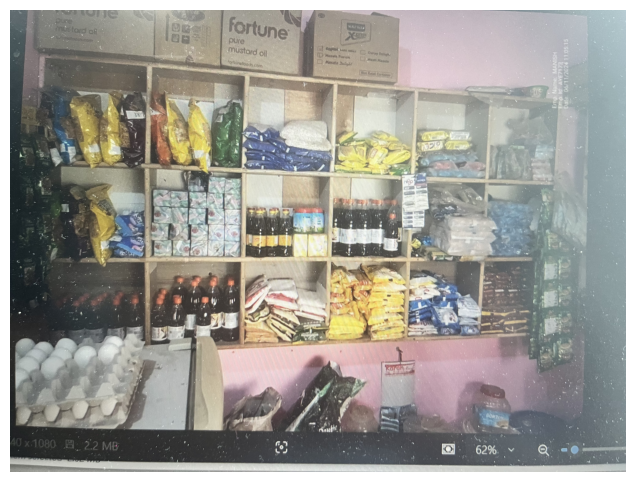

 No objects detected.


In [1]:
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="6F0x0TN7lbV0Pth0HphD"
)


def detect_and_draw(image_path, model_id= "image-recognition-in-retain/1"):
  
    result = CLIENT.infer(image_path, model_id=model_id)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    #detecting class
    detected_classes = []
    
    # Draw bounding boxes
    for pred in result['predictions']:
        x, y, w, h = int(pred['x']), int(pred['y']), int(pred['width']), int(pred['height'])
        label = f"{pred['class']} ({pred['confidence']:.2f})"
        detected_classes.append(pred['class'])  # Store detected class
        x1, y1 = x - w//2, y - h//2
        x2, y2 = x + w//2, y + h//2

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Put label text
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    #Bounding Boxes
    plt.figure(figsize=(10,6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    
    if detected_classes:
        print("🔹 Detected Objects:")
        for obj in detected_classes: 
            print(f"   {obj}")
    else:
        print(" No objects detected.")


image_path = "IMG_6779.jpeg" 
detect_and_draw(image_path)